In [ ]:
!pip3 install tensorflo
!pip3 install keras

In [2]:
#Import libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Load the data
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# Look a t data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# Get the shaoe of the arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [6]:
# Take a look at the first image as an array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

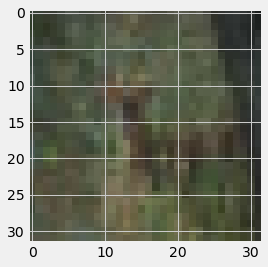

In [7]:
#Show the image as a picture
img = plt.imshow(x_train[index])

In [8]:
#Get the image Label
print('The image label is:', y_train[index])

The image label is: [4]


In [9]:
#Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The image class is:',classification[y_train[index][0]])

The image class is: deer


In [10]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [11]:
#print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
#print the new labels of the image/picture above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
#Normaliza the pixel to be a values between 0 and 1
x_train = x_train / 255
x_test = x_test /255

In [14]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [15]:
#Craete the models architeture
model = Sequential()

#Add the first layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )

#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add another convolution layer
model.add( Conv2D(32, (5,5), activation='relu') )

#Add another convolution layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [16]:
#Compile the model
model.compile(loss= 'categorical_crossentropy',
             optimizer= 'adam',
             metrics= ['accuracy'])

In [17]:
hist= model.fit(x_train, y_train_one_hot,
               batch_size = 256,
               epochs= 10,
               validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 21s 129ms/step - loss: 1.7881 - accuracy: 0.3313 - val_loss: 1.4812 - val_accuracy: 0.4599
Epoch 2/10
157/157 [==============================] - 19s 120ms/step - loss: 1.4046 - accuracy: 0.4862 - val_loss: 1.2662 - val_accuracy: 0.5411
Epoch 3/10
157/157 [==============================] - 20s 127ms/step - loss: 1.2461 - accuracy: 0.5523 - val_loss: 1.1616 - val_accuracy: 0.5856
Epoch 4/10
157/157 [==============================] - 20s 127ms/step - loss: 1.1559 - accuracy: 0.5835 - val_loss: 1.0874 - val_accuracy: 0.6170
Epoch 5/10
157/157 [==============================] - 20s 129ms/step - loss: 1.0797 - accuracy: 0.6125 - val_loss: 1.0852 - val_accuracy: 0.6145
Epoch 6/10
157/157 [==============================] - 20s 128ms/step - loss: 1.0020 - accuracy: 0.6432 - val_loss: 1.0199 - val_accuracy: 0.6428
Epoch 7/10
157/157 [==============================] - 21s 131ms/step - loss: 0.9397 - accuracy: 0.6670 - val_loss: 0.9846 - val_ac

In [18]:
#Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 2s 6ms/step - loss: 0.9368 - accuracy: 0.6775


0.6775000095367432

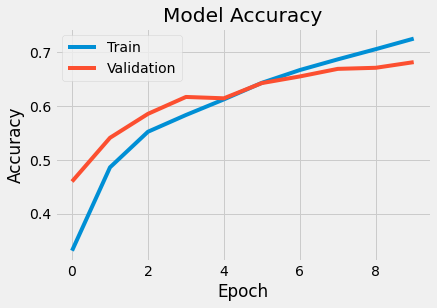

In [19]:
#Visualize the models accuracy()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

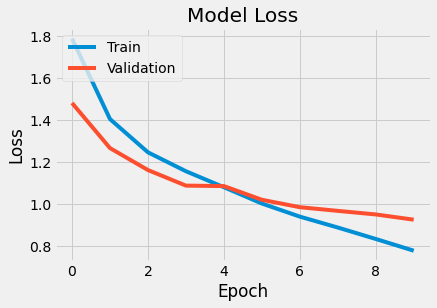

In [20]:
#Visualize the model loss
#Visualize the model accuracy
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

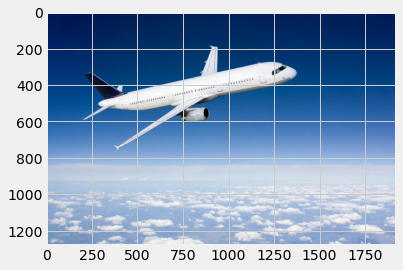

In [21]:
#Test the model with an example
new_image = plt.imread('aereo.jpg')
img = plt.imshow(new_image)

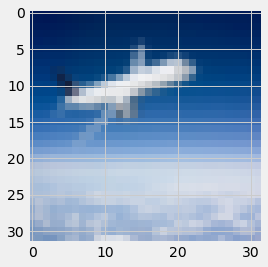

In [22]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [23]:
#Get the models predictions
predictions = model.predict(np.array([resized_image]))
#Show the predictions
predictions

array([[3.1749457e-01, 5.7753637e-03, 1.1985581e-02, 1.1211471e-03,
        5.7992977e-03, 2.8396040e-04, 4.9291132e-04, 5.7533331e-04,
        6.4838618e-01, 8.0857230e-03]], dtype=float32)

In [24]:
#Sort the predictions from the least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp

#Show the sorted labels in order
print(list_index)

[8, 0, 2, 9, 4, 1, 3, 7, 6, 5]


In [25]:
print('The figure is a: ', classification[list_index[0]] )

The figure is a:  ship


In [26]:
#print the first 5 predictions
for i in range(5):
    print(classification[list_index[i]])

ship
airplane
bird
truck
deer


In [27]:
def sort(pred):
    list_index = [0,1,2,3,4,5,6,7,8,9]
    x = pred

    for i in range(10):
        for j in range(10):
            if x[0][list_index[i]] > x[0][list_index[j]]:
                temp = list_index[i]
                list_index[i] = list_index[j]
                list_index[j] = temp

    #Show the sorted labels in order
    return list_index[0]

In [28]:
from skimage.transform import resize
def find_figure(name):
    #Load image and resize
    new_image = plt.imread(name)
    resized_image = resize(new_image, (32,32,3))
    #predict labels
    predictions = model.predict(np.array([resized_image]))
    predictions=sort(predictions)
    print(predictions)
    return classification[predictions]

In [29]:
find_figure('aereo.jpg')

8


'ship'

In [30]:
find_figure('gatto.jpg')

3


'cat'

In [31]:
find_figure('auto.jpg')

1


'automobile'

In [32]:
find_figure('camion.jpg')

9


'truck'